# PROYECTO FINAL CIENCIA DE DATOS II
##DATASET PRECIOS DE AUTOMOVILES

"Este proyecto se centra en el análisis de un conjunto de datos de precios de automóviles, cuyo objetivo principal es predecir el precio de un vehículo en función de atributos clave como la marca, el modelo, el año, el tamaño del motor, el tipo de combustible, la transmisión, el kilometraje, el número de puertas, el número de propietarios anteriores y más. El precio de los automóviles es una variable de gran interés tanto para compradores como para vendedores, así como para aplicaciones de tasación automática. Este análisis puede contribuir a una mejor comprensión de los factores que influyen en los precios de los vehículos usados."

"Este análisis podría ser beneficioso para varias audiencias, incluyendo concesionarios de automóviles, plataformas de compra-venta de autos, empresas de seguros y financiamiento, y consumidores interesados ​​en conocer el valor de mercado de vehículos usados. Además, la industria automotriz podría usar este análisis para realizar predicciones de precios y optimizar estrategias de ventas."
Problema : *¿Cómo podemos predecir el precio de un automóvil basado en sus características (marca, modelo, año, tamaño del motor, tipo de combustible, transmisión, kilometraje, número de puertas, y cantidad de propietarios anteriores)

In [35]:
import pandas as pd

# Cargar el archivo CSV con separación por punto y coma
df = pd.read_csv("car price dataset.csv", sep=';', encoding='utf-8')

# Verificar las primeras filas del dataset
df.head()


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


Resumen de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None

Primeras filas del dataset:
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     G

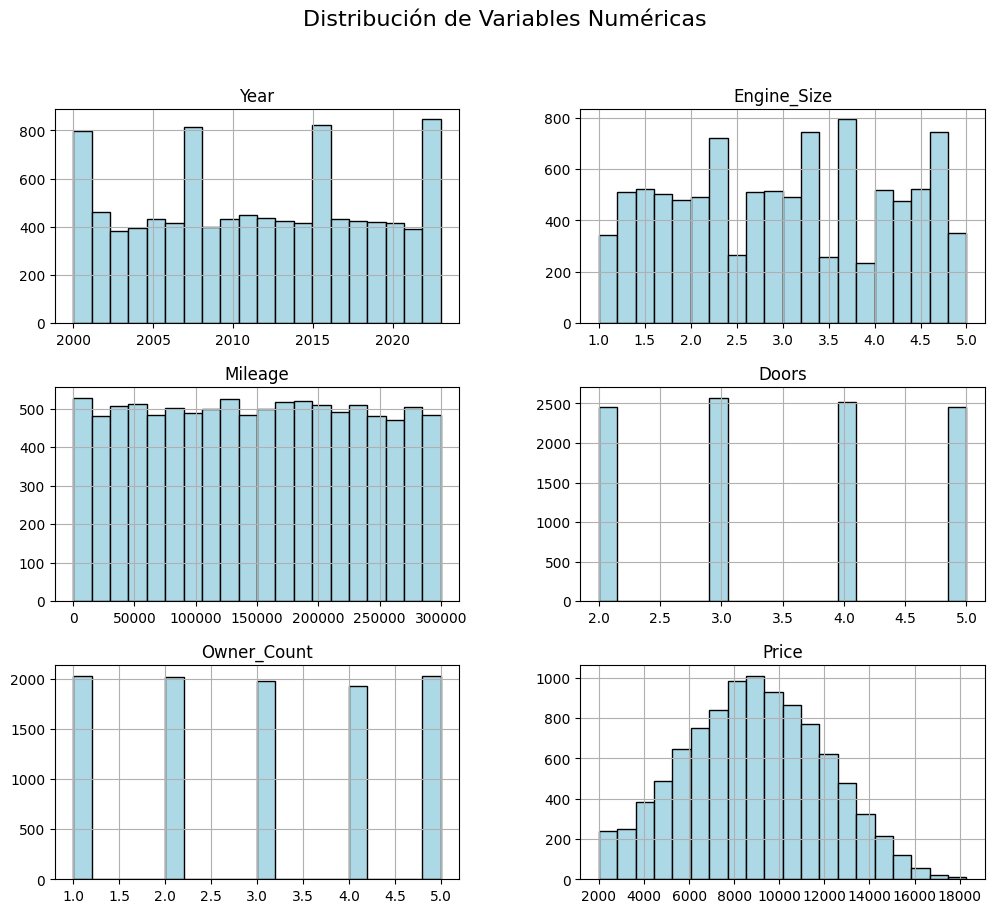

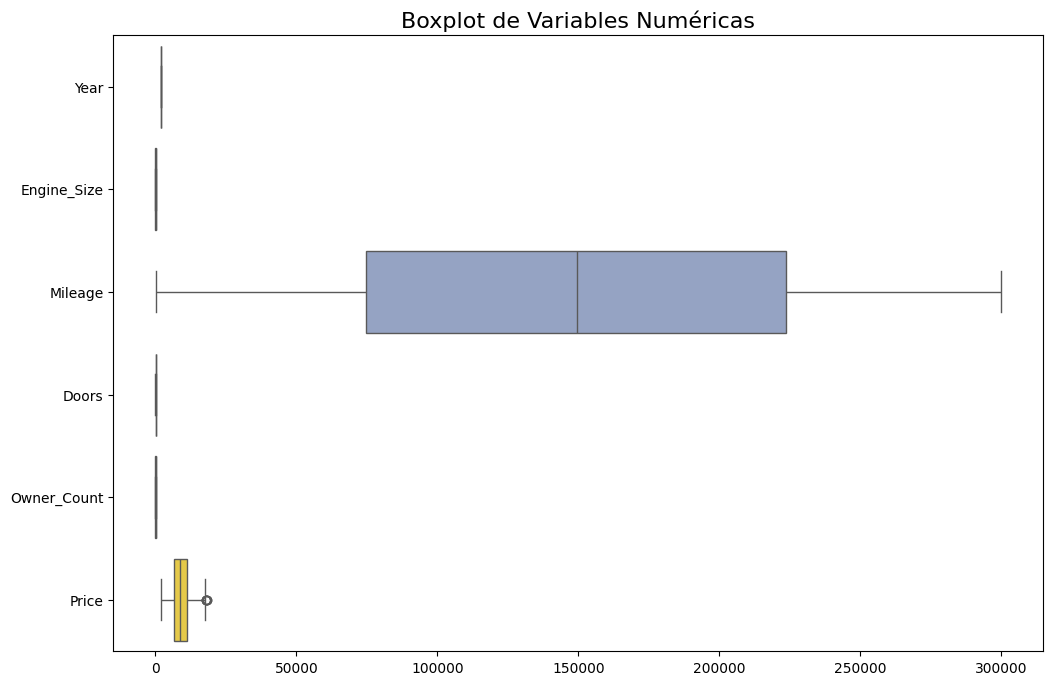

In [4]:
# Resumen de los datos
print("Resumen de los datos:")
print(df.info())  # Información general sobre las columnas y tipos de datos
print("\nPrimeras filas del dataset:")
print(df.head())  # Ver las primeras filas

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())  # Estadísticas de las columnas numéricas

# Comprobar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())  # Ver los valores nulos en cada columna

# Visualización de la distribución de las variables
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de las variables numéricas
df.hist(figsize=(12, 10), bins=20, color='lightblue', edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()

# Boxplots para ver posibles outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot de Variables Numéricas", fontsize=16)
plt.show()


In [5]:
# 1. Manejo de valores nulos
# Si hay valores nulos, podemos imputarlos con la media o eliminar filas/columnas
df.fillna(df.mean(), inplace=True)  # Imputar valores numéricos con la media de cada columna

# 2. Conversión de variables categóricas a numéricas
# Convertir columnas categóricas en variables numéricas utilizando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Brand'], drop_first=True)

# 3. Creación de nuevas variables
# Crear una nueva columna para la edad del automóvil
df_encoded['Car_Age'] = 2025 - df_encoded['Year']

# Verificar las primeras filas con las nuevas variables
df_encoded.head()


C:\Users\metal\AppData\Local\Temp\ipykernel_25108\1887003029.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)  # Imputar valores numéricos con la media de cada columna


,Model,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,...,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,Car_Age
0,Rio,2020,4.2,289944,3,5,8501,0,0,0,...,0,0,0,0,0,1,0,0,0,5
1,Malibu,2012,2.0,5356,2,3,12092,0,1,0,...,0,1,0,0,0,0,0,0,0,13
2,GLA,2020,4.2,231440,4,2,11171,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,Q5,2023,2.0,160971,2,1,11780,1,0,0,...,0,0,0,0,0,0,0,0,0,2
4,Golf,2003,2.6,286618,3,3,2867,0,1,0,...,0,0,0,0,0,0,0,0,1,22


In [14]:
from sklearn.preprocessing import LabelEncoder

# Verificar las columnas en df_encoded
print(df_encoded.columns)

# Codificar las columnas categóricas
label_encoder = LabelEncoder()

# Verificar si las columnas existen antes de codificar
if 'Brand' in df_encoded.columns:
    df_encoded['Brand'] = label_encoder.fit_transform(df_encoded['Brand'])
else:
    print("La columna 'Brand' no se encuentra en el DataFrame.")

if 'Fuel_Type' in df_encoded.columns:
    df_encoded['Fuel_Type'] = label_encoder.fit_transform(df_encoded['Fuel_Type'])
else:
    print("La columna 'Fuel_Type' no se encuentra en el DataFrame.")

if 'Transmission' in df_encoded.columns:
    df_encoded['Transmission'] = label_encoder.fit_transform(df_encoded['Transmission'])
else:
    print("La columna 'Transmission' no se encuentra en el DataFrame.")

# Verificar que las columnas ahora estén numéricas
print(df_encoded.head())


Index(['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price',
       'Fuel_Type_Electric', 'Fuel_Type_Hybrid', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Transmission_Semi-Automatic', 'Brand_BMW',
       'Brand_Chevrolet', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Kia', 'Brand_Mercedes', 'Brand_Toyota', 'Brand_Volkswagen',
       'Car_Age', 'Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5',
       'Model_6', 'Model_7', 'Model_8', 'Model_9', 'Model_10', 'Model_11',
       'Model_12', 'Model_13', 'Model_14', 'Model_15', 'Model_16', 'Model_17',
       'Model_18', 'Model_19', 'Model_20', 'Model_21', 'Model_22', 'Model_23',
       'Model_24', 'Model_25', 'Model_26', 'Model_27', 'Model_28', 'Model_29'],
      dtype='object')
La columna 'Brand' no se encuentra en el DataFrame.
La columna 'Fuel_Type' no se encuentra en el DataFrame.
La columna 'Transmission' no se encuentra en el DataFrame.
   Year  Engine_Size  Mileage  Doors  Owner_Count  Price  Fuel

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# 1. Dividir el dataset en conjunto de entrenamiento y prueba
X = df_encoded.drop('Price', axis=1)  # Características
y = df_encoded['Price']  # Variable objetivo (Precio)

# Dividir en entrenamiento y prueba (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Entrenamiento de los modelos

# Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Árbol de Decisión
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# 3. Evaluación de los modelos con validación cruzada (para evitar sobreajuste)
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# 4. Evaluación final en el conjunto de prueba
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Métricas de desempeño
lr_mse = mean_squared_error(y_test, y_pred_lr)
dt_mse = mean_squared_error(y_test, y_pred_dt)

lr_r2 = r2_score(y_test, y_pred_lr)
dt_r2 = r2_score(y_test, y_pred_dt)

# Mostrar los resultados
print(f"Regresión Lineal - MSE: {lr_mse}, R^2: {lr_r2}")
print(f"Árbol de Decisión - MSE: {dt_mse}, R^2: {dt_r2}")

# Promedio de las puntuaciones de validación cruzada
print(f"\nValidación cruzada - Regresión Lineal (MSE promedio): {lr_cv_scores.mean()}")
print(f"Validación cruzada - Árbol de Decisión (MSE promedio): {dt_cv_scores.mean()}")


Regresión Lineal - MSE: 4213.922497655918, R^2: 0.999541357336541
Árbol de Decisión - MSE: 825876.348, R^2: 0.9101117478678945

Validación cruzada - Regresión Lineal (MSE promedio): -8215.710606040999
Validación cruzada - Árbol de Decisión (MSE promedio): -879346.335


In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Modelo Lasso
lasso_model = Lasso()

# Ajuste de hiperparámetros (alpha controla la regularización)
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid_search = GridSearchCV(lasso_model, parameters, cv=5, scoring='neg_mean_squared_error')

# Entrenamiento del modelo
lasso_grid_search.fit(X_train, y_train)

# Mejor modelo
best_lasso_model = lasso_grid_search.best_estimator_

# Evaluación en el conjunto de prueba
y_pred_lasso = best_lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f"Lasso - MSE: {lasso_mse}, R^2: {lasso_r2}")


C:\Users\metal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.755e+07, tolerance: 6.253e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\metal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.325e+07, tolerance: 6.350e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\metal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.674e+07, toleranc

Lasso - MSE: 4191.471313142314, R^2: 0.9995438009199409


In [18]:
from sklearn.tree import DecisionTreeRegressor

# Árbol de Decisión con ajuste de hiperparámetros
dt_model = DecisionTreeRegressor(random_state=42)

# Definir el grid de parámetros
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Búsqueda en cuadrícula
dt_grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrenamiento del modelo
dt_grid_search.fit(X_train, y_train)

# Mejor modelo
best_dt_model = dt_grid_search.best_estimator_

# Evaluación en el conjunto de prueba
y_pred_dt = best_dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print(f"Árbol de Decisión (Ajustado) - MSE: {dt_mse}, R^2: {dt_r2}")


Árbol de Decisión (Ajustado) - MSE: 715322.1100112245, R^2: 0.9221444537840686


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda en cuadrícula
parameters = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor()

# Búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(tree_model, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_tree_model = grid_search.best_estimator_

# Evaluación del modelo ajustado
y_pred_best_tree = best_tree_model.predict(X_test)
best_tree_mse = mean_squared_error(y_test, y_pred_best_tree)
best_tree_r2 = r2_score(y_test, y_pred_best_tree)

print(f"Árbol de Decisión Ajustado - MSE: {best_tree_mse}, R^2: {best_tree_r2}")


Árbol de Decisión Ajustado - MSE: 717960.7728513491, R^2: 0.9218572621345691


In [20]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mostrar resultados
print(f"Validación cruzada - MSE promedio: {-cv_scores.mean()}")


Validación cruzada - MSE promedio: 752950.9889638477


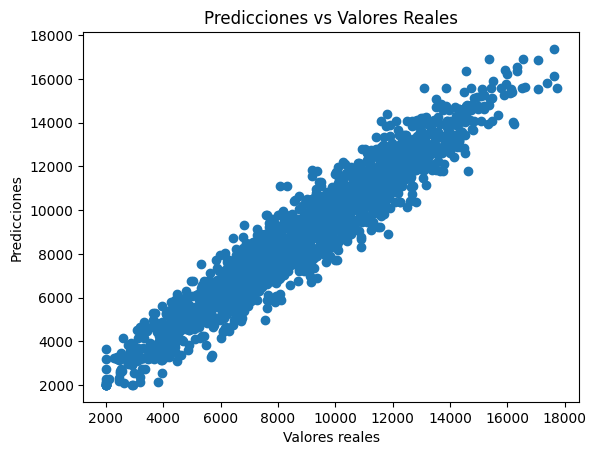

In [21]:
# Comparar predicciones vs valores reales
plt.scatter(y_test, y_pred_best_tree)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Dividir el dataset en conjunto de entrenamiento y prueba
X = df_encoded.drop('Price', axis=1)  # Características
y = df_encoded['Price']  # Variable objetivo (Precio)

# Dividir en entrenamiento y prueba (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Entrenamiento del modelo
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Métricas de desempeño
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Evaluación con validación cruzada
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mostrar los resultados
print(f"Random Forest - MSE: {rf_mse}, R^2: {rf_r2}")
print(f"Validación cruzada - Random Forest (MSE promedio): {rf_cv_scores.mean()}")


Random Forest - MSE: 295853.35672800004, R^2: 0.9677993670746262
Validación cruzada - Random Forest (MSE promedio): -345985.2034179501


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Definir el modelo
rf = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializar búsqueda aleatoria
random_search = RandomizedSearchCV(rf, param_dist, n_iter=50, cv=5,
                                   scoring='neg_mean_squared_error', n_jobs=-1,
                                   random_state=42)
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)


Mejores hiperparámetros: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': True}


In [31]:
# Entrenar el modelo con los mejores hiperparámetros
best_rf = RandomForestRegressor(n_estimators=400, 
                                min_samples_split=2, 
                                min_samples_leaf=2, 
                                max_depth=30, 
                                bootstrap=True, 
                                random_state=42)

best_rf.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_final = best_rf.predict(X_test)

# Evaluación del modelo final
final_mse = mean_squared_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

print(f"Modelo Final - MSE: {final_mse}, R^2: {final_r2}")


Modelo Final - MSE: 266832.76785230683, R^2: 0.9709579634143782


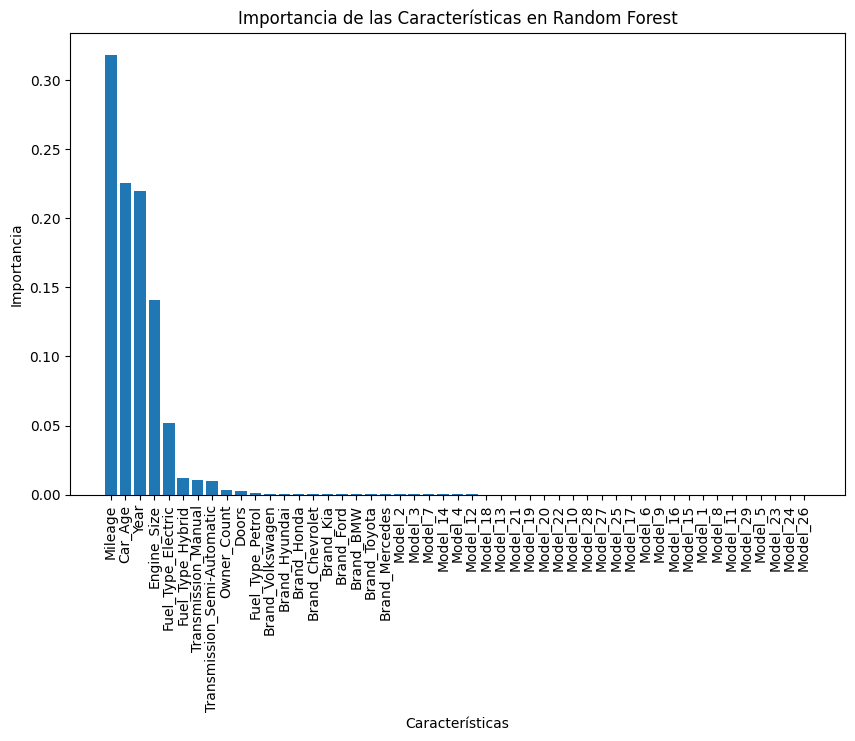

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
feature_importances = best_rf.feature_importances_
features = X_train.columns

# Ordenar por importancia
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(features)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(features)), np.array(features)[sorted_idx], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las Características en Random Forest")
plt.show()


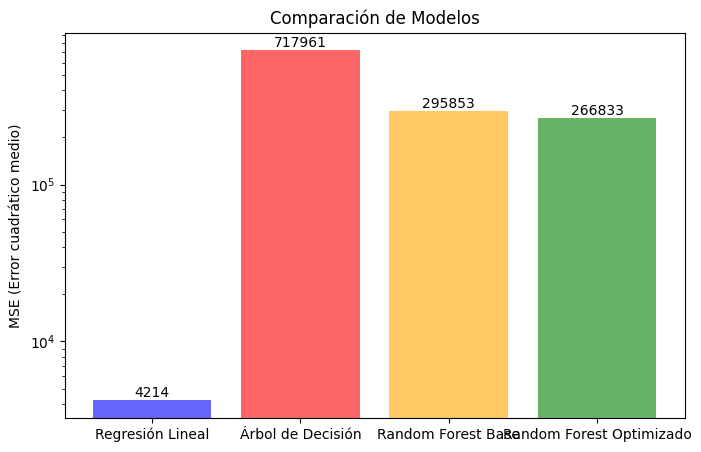

In [33]:
models = ["Regresión Lineal", "Árbol de Decisión", "Random Forest Base", "Random Forest Optimizado"]
mse_scores = [4213.92, 717960.77, 295853.35, final_mse]
r2_scores = [0.99954, 0.92185, 0.96779, final_r2]

fig, ax1 = plt.subplots(figsize=(8,5))

# Gráfico de MSE (Barras)
ax1.bar(models, mse_scores, color=['blue', 'red', 'orange', 'green'], alpha=0.6)
ax1.set_ylabel("MSE (Error cuadrático medio)")
ax1.set_yscale("log")  # Escala logarítmica para ver mejor la diferencia
ax1.set_title("Comparación de Modelos")

# Agregar valores encima de las barras
for i, v in enumerate(mse_scores):
    ax1.text(i, v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.show()


In [34]:
import joblib
joblib.dump(rf_model, 'random_forest_optimizado_modelo.pkl')


['random_forest_optimizado_modelo.pkl']

#CONCLUSION FINAL

1. Preprocesamiento y Exploración de Datos:
Comenzamos con la carga de los datos y la limpieza de los mismos, donde nos aseguramos de manejar valores faltantes y variables categóricas. Utilizamos One-Hot Encoding para convertir
También real
2. Modelado inicial:
Probamos varios modelos de regresión, como Regresión Lineal , Árboles de Decisión ,Bosque aleatorio , utilizaMSE (Error CuadráR² (coeficiente
Inicialmente, todos los modelos ofrecieron buenos resultados, pero algunas limitaciones. En particular, el Árbol de Decisión y el Random Forest resultaron ser más adecuados
3. Optimización del Modelo:
A continuación, aplicamos optimización de hiperparámetros en el modelo de **RanBosque aleatorio usando **RandomiRandomizedSearchCV para encontrar la mejor combinación de parámetrosn_estimators), lo profundomax_depth),min_samples_splity `min_muestras_hojamin_samples_leaf).
Con la optimización, conseguimos mejorar significativamente el rendimiento del modelo, reduciendo el MSE y aumentando el R²..
4. Evaluación y Comparación de Modelos:
Evaluamos el rendimiento de cada modelo utilizando el conjunto de prueba y validación cruzada . El modelo de **RaSe optimizó Random ForestMSE de 266.832y un R² de 0.97 , lo que indica que el modelo es capaz de
Aunque la Regresión Lineal también se muestraBosque aleatorio .
5. Modelo Final y Selección:
Después de una evaluación exhaustiva, el modelo final seleccionado fue el Random Forest optimizado , debido a su capacidad superior.
6. Conclusiones Finales:
Hemos logrado desarrollar un modelo predictivo confiable que estima el precio de los vehículos con alta precisión. El modelo de Random Forest optimizado es el más publicitario